# covariance    #corelation

In [19]:
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
df=sns.load_dataset('tips')

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.cov()

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


In [7]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [8]:
df.corr(method='spearman')

,total_bill,tip,size
total_bill,1.000000,0.678968,0.604791
tip,0.678968,1.000000,0.468268
size,0.604791,0.468268,1.000000


# Normal Distribution

In [9]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

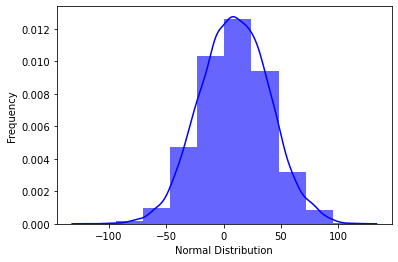

In [13]:
from scipy.stats import norm
normal_data=norm.rvs(size=9000,loc=10,scale=30)
axis=sns.distplot(normal_data,bins=10,kde=True,color="blue",hist_kws={"linewidth":10,"alpha":0.6})
axis.set(xlabel="Normal Distribution",ylabel="Frequency")

# chi-square testing

In [1]:
import scipy.stats as stats

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
dataset=sns.load_dataset('tips')

In [4]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
dataset_table=pd.crosstab(dataset['sex'],dataset['smoker'])
print(dataset_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [6]:
dataset_table.values

array([[60, 97],
       [33, 54]], dtype=int64)

In [8]:
observe_values=dataset_table.values
print("Observed Values : \n",observe_values)

Observed Values : 
 [[60 97]
 [33 54]]


In [10]:
val=stats.chi2_contingency(dataset_table)
val

(0.0,
 1.0,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [11]:
expected_values=val[3]
expected_values

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [12]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom : ",ddof)
alpha=0.05

Degree of Freedom :  1


In [13]:
from scipy.stats import chi2

In [14]:
chi_square=sum([(o-e)**2./e for o,e in zip(observe_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]
chi_square_statistic

0.001934818536627623

In [15]:
print("chi_square_statistic : ",chi_square_statistic)

chi_square_statistic :  0.001934818536627623


In [16]:
#p-value

p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print("P-Value : ",p_value)
print("Significant Level : ",alpha)
print("Degree of Freedom : ",ddof)
print("P_Value : ",p_value)

P-Value :  0.964915107315732
Significant Level :  0.05
Degree of Freedom :  1
P_Value :  0.964915107315732


In [18]:
if p_value<=alpha:
    print("Reject HO, There is a relationship between 2 categorical variables")
else:
    print("Retain HO, There is a relationship between 2 categorical variables")

Retain HO, There is a relationship between 2 categorical variables
